In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor #GB
from sklearn.model_selection import validation_curve #krzywa walidacji
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#import seaborn as sn

In [2]:
df = pd.read_csv('data/disk_failures.csv', true_values=['Yes.', 'True.'], false_values=['No.','False.'])
df

,Date,CapacityBytes,Model,SerialNumber,SMART_1_Raw,SMART_2_Raw,SMART_3_Raw,SMART_4_Raw,SMART_5_Raw,DiskFailure
0,6/8/15,2.000000e+12,Hitachi HDS722020ALA330,JK2171B9J0G26L,0.0,1.0,39063.0,31.0,0.0,Yes
1,8/28/14,2.000000e+12,Hitachi HDS722020ALA330,JK11A8B9J7EZJF,0.0,1.0,30730.0,32.0,0.0,Yes
2,12/15/14,4.000000e+12,HGST HMS5C4040ALE640,PL2331LAGUHZ6J,0.0,0.0,1806.0,24.0,0.0,No
3,12/31/13,1.500000e+12,ST31500341AS,9VS21JD2,104152028.0,102.0,36008.0,26.0,0.0,Yes
4,1/29/14,1.500000e+12,ST31500541AS,6XW05BBP,133405108.0,1242.0,37515.0,21.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...
8197,10/3/14,3.000000e+12,Hitachi HDS5C3030ALA630,MJ1311YNG3EK2A,0.0,0.0,26353.0,27.0,0.0,No
8198,3/24/15,4.000000e+12,Hitachi HDS5C4040ALE630,PL1311LAG2731A,0.0,0.0,10489.0,23.0,0.0,Yes
8199,9/25/14,3.000000e+12,ST3000DM001,S1F0T2PA,223688808.0,0.0,17749.0,32.0,24.0,Yes
8200,8/12/15,4.000000e+12,ST4000DM000,W3007K9N,152129792.0,0.0,16836.0,25.0,64.0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8202 non-null   object 
 1   CapacityBytes  8202 non-null   float64
 2   Model          8202 non-null   object 
 3   SerialNumber   8202 non-null   object 
 4   SMART_1_Raw    8193 non-null   float64
 5   SMART_2_Raw    8194 non-null   float64
 6   SMART_3_Raw    8194 non-null   float64
 7   SMART_4_Raw    8194 non-null   float64
 8   SMART_5_Raw    8194 non-null   float64
 9   DiskFailure    8202 non-null   object 
dtypes: float64(6), object(4)
memory usage: 640.9+ KB


In [4]:
to_drop = ['Model', 'SerialNumber', 'Date']
df.drop(to_drop, axis=1, inplace=True)

df.DiskFailure = df.DiskFailure.astype('category')
df.DiskFailure

0       Yes
1       Yes
2        No
3       Yes
4       Yes
       ... 
8197     No
8198    Yes
8199    Yes
8200    Yes
8201    Yes
Name: DiskFailure, Length: 8202, dtype: category
Categories (2, object): ['No', 'Yes']

In [5]:
mapper2 = {'Yes':1,'No':0}
df['DiskFailure'] = df['DiskFailure'].replace(mapper2)

In [6]:
df=df.dropna()

In [7]:
X=df[df.columns[:6]] 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8201
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CapacityBytes  8193 non-null   float64
 1   SMART_1_Raw    8193 non-null   float64
 2   SMART_2_Raw    8193 non-null   float64
 3   SMART_3_Raw    8193 non-null   float64
 4   SMART_4_Raw    8193 non-null   float64
 5   SMART_5_Raw    8193 non-null   float64
dtypes: float64(6)
memory usage: 448.1 KB


In [8]:
X1=preprocessing.normalize(X)
X=X1
X

array([[1.00000000e+00, 0.00000000e+00, 5.00000000e-13, 1.95315000e-08,
        1.55000000e-11, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 5.00000000e-13, 1.53650000e-08,
        1.60000000e-11, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.51500000e-10,
        6.00000000e-12, 0.00000000e+00],
       ...,
       [9.99999997e-01, 7.45629358e-05, 0.00000000e+00, 5.91633332e-09,
        1.06666666e-11, 7.99999998e-12],
       [9.99999999e-01, 3.80324480e-05, 0.00000000e+00, 4.20900000e-09,
        6.25000000e-12, 1.60000000e-11],
       [9.99999999e-01, 3.26406905e-05, 0.00000000e+00, 9.29050000e-09,
        1.05000000e-11, 0.00000000e+00]])

In [9]:
y=df['DiskFailure']
y

0       1
1       1
2       0
3       1
4       1
       ..
8197    0
8198    1
8199    1
8200    1
8201    1
Name: DiskFailure, Length: 8193, dtype: int64

In [10]:
def krzywa_walidacji(parametry, train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)#odchylenie std. liczb od ich śr. aryt., to pierwiastek kwadratowy z wariancji

    #uczenie
    plt.plot(parametry, train_mean, color='red',
            marker='3', markersize=5, label='Dokładność uczenia')
    plt.fill_between(parametry, train_mean+train_std, train_mean-train_std, alpha=0.20,
                    color='red')
    #walidacja
    plt.plot(parametry, test_mean, color='blue', linestyle='--',
            marker='4', markersize=5, label='Dokładność walidacji')
    plt.fill_between(parametry, test_mean+test_std, test_mean-test_std, alpha=0.20,
                    color='blue')
    #parametry pozostałe
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Wartość testowanego parametru')
    plt.ylabel('neg_mean_squared_error')
    plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

#pipline - standaryzacja potem gradientboost
pipe = Pipeline([('ss', StandardScaler()),
                 ('gb',GradientBoostingRegressor())])

"""Standaryzacja – rodzaj normalizacji - średnia wartość oczekiwana zero, odchylenie standardowe jeden"""

'Standaryzacja – rodzaj normalizacji - średnia wartość oczekiwana zero, odchylenie standardowe jeden'

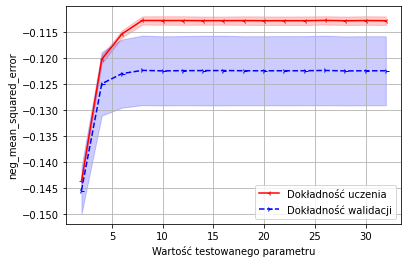

In [12]:
#sprawdzany parametr
max_leaf = list(range(2,33,2))

train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__max_leaf_nodes',
                                          param_range=max_leaf,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(max_leaf, train_score, test_score)

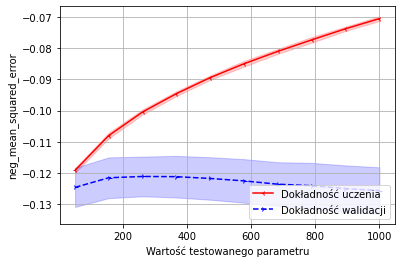

In [13]:
#sprawdzany parametr
n_trees = list(np.linspace(50,1000,10).astype('int')) #10 roznych wartosci drzew od 50 do 3000

train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__n_estimators',
                                          param_range=n_trees,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(n_trees, train_score, test_score)

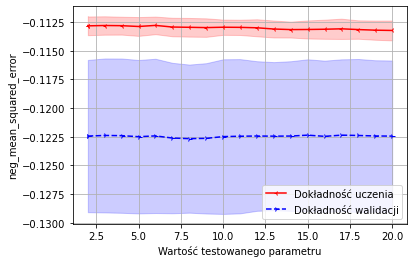

In [14]:
#sprawdzany parametr
min_samples = list(np.linspace(2,20, 20).astype('int'))# 1,500, 10     1,5,4
#list(np.linspace(2,20, 20).round(2))

train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__min_samples_split',
                                          param_range=min_samples,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(min_samples, train_score, test_score)

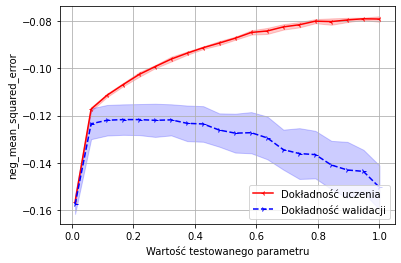

In [15]:
#sprawdzany parametr
learning_rate = list(np.linspace(0.01, 1, 20))

train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__learning_rate',
                                          param_range=learning_rate,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(learning_rate, train_score, test_score)

In [19]:
min_samples = [2,3,5,10,15]
max_leaf = [3,5,7,10]
n_trees = [150,200,300,450,550]
lr = [0.05,0.22,0.28]
params = [{'gb__min_samples_split': min_samples,
          'gb__max_leaf_nodes': max_leaf,
          'gb__max_features':['log2'],
          'gb__learning_rate':lr,
          'gb__n_estimators': n_trees}]

grid_search = GridSearchCV(estimator=pipe,
                          param_grid=params,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

gs = grid_search.fit(X_train,y_train)

print("Najlepszy wynik: {}".format(gs.best_score_))
print("Najlepsza konfiguracja: ")
gs.best_params_

Najlepszy wynik: -0.1206482286771017
Najlepsza konfiguracja: 


{'gb__learning_rate': 0.05,
 'gb__max_features': 'log2',
 'gb__max_leaf_nodes': 10,
 'gb__min_samples_split': 5,
 'gb__n_estimators': 550}

In [20]:
#gs.cv_results_

{'mean_fit_time': array([0.59463396, 0.76384363, 1.08706212, 1.61369238, 1.9707128 ,
        0.56383214, 0.75064282, 1.14346533, 1.6902967 , 2.38773661,
        0.6308362 , 0.77024412, 1.15026569, 1.6178925 , 1.98791375,
        0.57723312, 0.77404437, 1.14086528, 1.72349858, 2.29133105,
        0.68503923, 0.80124588, 1.21286931, 1.79170232, 2.20212593,
        0.68063889, 0.89925146, 1.41188078, 2.32133279, 2.49774289,
        0.8676496 , 1.45968361, 1.67129564, 2.1435226 , 2.85036297,
        0.77244425, 1.03285913, 1.5080863 , 2.14892297, 2.61994982,
        0.73164196, 0.98465638, 1.47588453, 2.35613475, 3.04457417,
        0.79984584, 1.06246066, 1.56408954, 2.32553291, 3.14237986,
        0.81164641, 1.19966865, 1.75630035, 2.47874179, 3.2053833 ,
        0.82684731, 1.25127153, 1.85210605, 2.48874226, 3.0269732 ,
        0.8486485 , 1.17046685, 1.69169688, 2.82536159, 3.09197693,
        0.82144685, 1.11706381, 1.71029792, 2.53494496, 3.30998926,
        0.82784724, 1.0962626 ,

In [21]:
from sklearn.metrics import mean_squared_error
gb = gs.best_estimator_
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("Mse testu: {}".format(mean_squared_error(y_test,y_pred)))

Mse testu: 0.11439508928037712


In [22]:
params2 = [{'gb__min_samples_split': min_samples,
          'gb__max_leaf_nodes': max_leaf,
          'gb__max_features':['sqrt'],
          'gb__learning_rate':lr,
          'gb__n_estimators': n_trees}]

grid_search = GridSearchCV(estimator=pipe,
                          param_grid=params2,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

gs = grid_search.fit(X_train,y_train)

print("Najlepszy wynik: {}".format(gs.best_score_))
print("Najlepsza konfiguracja: ")
gs.best_params_

Najlepszy wynik: -0.1210085276766228
Najlepsza konfiguracja: 


{'gb__learning_rate': 0.05,
 'gb__max_features': 'sqrt',
 'gb__max_leaf_nodes': 10,
 'gb__min_samples_split': 3,
 'gb__n_estimators': 550}

In [23]:
from sklearn.metrics import mean_squared_error
gb = gs.best_estimator_
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("Mse testu: {}".format(mean_squared_error(y_test,y_pred)))

Mse testu: 0.11479803679182624
